## Activity 03
### Tyler Barna

In [27]:
## import modules (running on python 3.9.12)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom
import random
random.seed(5731) ## set seed for reproducibility

## import data
df = pd.read_csv('MountStrombloAbellClusterSN_Survey.dat', sep='\s+')

## add a column for just the year by converting SN column
df['year'] = df['SN'].str.extract('(\d{4})', expand=True).astype(int)
df.head()

,SN,Abell,Type,year
0,1996af,3879,nIa,1996
1,1996ag,3809,Ia?,1996
2,1996aj,3559,Ia,1996
3,1996am,3809,Ia,1996
4,1996ao,3128,Ia,1996


In [26]:
## Import Ia and Ia? data
df_Ia = df[(df['Type'] == 'Ia') | (df['Type'] == 'Ia?')]

## print some stats on the data
print('Number of Ia and Ia? SNe: %s \n'%len(df_Ia))
print('Number of clusters with Ia and Ia? SNe: %s \n'%len(df_Ia['Abell']))
print('Number of unique clusters with Ia and Ia? SNe: %s \n'%len(df_Ia['Abell'].unique()))
print('Year range of Ia and Ia? SNe: %s - %s \n'%(df_Ia['year'].min(), df_Ia['year'].max()))


Number of Ia and Ia? SNe: 23 

Number of clusters with Ia and Ia? SNe: 23 

Number of unique clusters with Ia and Ia? SNe: 18 

Year range of Ia and Ia? SNe: 1996 - 1999 



<AxesSubplot:xlabel='Abell'>

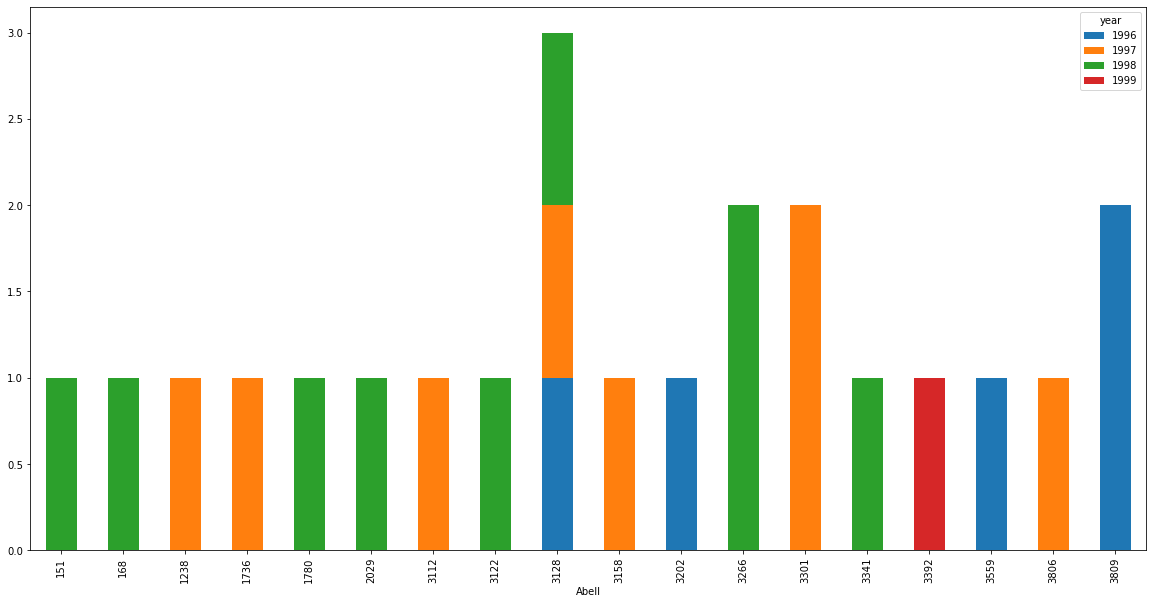

In [19]:
## group SN by Abell Cluster and year and plot histogram
df_Ia.groupby(['Abell', 'year']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))